# Der Ruin des Spielers - Mit Visualisierung

In der Fallstudie *Der Ruin des Spielers* haben wir eine Roulette-Simulation geschrieben, mit der wir berechnen konnten, wie häufig ein Spieler beim Roulettespielen einen bestimmten Zielbetrag erreicht, und wie oft er vorher Bankrott getht. 

In dieser Fallstudie werden wir auf unserer Lösung aufbauen, zusätzlich aber verschiedene Aspekte mit Matplotlib (pyplot) visualisieren. 

### Ein Spiel simulieren

Nun nutzen wir diese Zufallsfunktion um ein [Roulettespiel](https://de.wikipedia.org/wiki/Roulette) zu simulieren. Wir schreiben uns dafür eine Funktion. Diese bekommt als Argument unseren Einsatz, und gibt unseren Gewinn zurück. Was wir zurückbekommen ist zwei mal der Einsatz im Gewinnfall, oder 0 falls wir nicht gewinnen. Wir setzen dabei immer nur auf eine der Farben und schliessen nie andere Wetten ab.Da es keinen Unterschied für die Gewinnchancen macht ob wir auf Rot oder Schwarz setzen, bilden wir dies in unserer Funktion nicht ab. Wir implementieren nur die Tatsache, dass wir in 19 von 37 Fällen verlieren und in 18 gewinnen. 

In [2]:
import random

def play_game(bet): 
    random_number = random.randint(0, 36)
    if random_number == 0:
        return 0
    elif random_number <= 18:
        return 0
    else: 
        return 2 * bet

In [3]:
play_game(5)

0

### Wie oft gewinnen wir ein einzelnes Spiel 

Als erste, einfachste Visualisierung, erstellen wir einen Barchart, der anzeigt, wie oft wir gewinnen und wie oft wir verlieren, wenn wir viele Male spielen. 

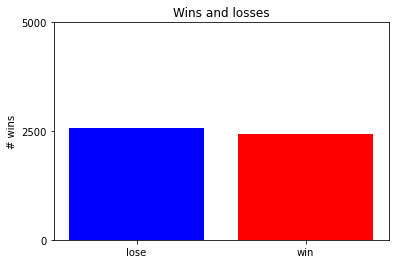

In [5]:
from matplotlib.pyplot import *

n_games = 5000
n_wins = 0
n_losses = 0
for i in range(0, n_games):
    if play_game(1) == 0:
        n_losses = n_losses + 1
    else:
        n_wins = n_wins + 1
        
bar(["lose", "win"], [n_losses, n_wins], color=["blue", "red"])
title("Wins and losses")
ylabel("# wins")
yticks([0, n_games / 2, n_games])
show()


### Wie oft können wir spielen, bevor wir bankrott sind. 

Wir haben uns auch eine Funktion geschrieben, die Spiele simuliert und zählt, wie lange es dauert bis wir bankrott sind. Nun wollen wir diesen Aspekt simulieren. Dafür nutzen wir ein Histogram.


In [6]:

def play_until_ruined(initial_amount, bet):
    balance = initial_amount
    
    num_games = 0
    while balance >= bet :
        balance = balance - bet
        balance = balance + play_game(bet)
        num_games = num_games + 1
        
    return num_games

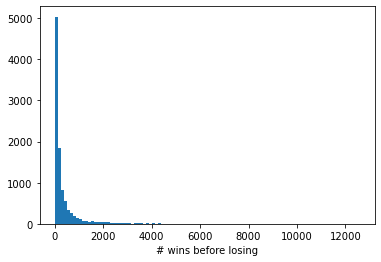

In [11]:
num_played_before_ruined = []


for i in range(0, 10000):
    num_til_ruined = play_until_ruined(100, 10)
    num_played_before_ruined.append(num_til_ruined)
    
hist(num_played_before_ruined, bins=100, label='empirical')
xlabel("# wins before losing")

show()


### Spielen mit Zielbetrag

Im weiteren haben wir Spiele simuliert, bei denen der Spieler solange Spielt, bis ein bestimmter Zielbetrag erreicht wurde. Den Verlauf von so einer Serie von Spielen zu visualisieren, gibt uns interessante Einsichten wie die dynamik dieses Prozesses ist. 


In [16]:

def play_until_target_reached_or_ruined(initial_amount, bet, target_amount):
    balance = initial_amount

    balances = []
    
    while balance >= bet and balance < target_amount:
        balance = balance - bet
        balance = balance + play_game(bet)
        balances.append(balance)

    return (balance >= target_amount, balances)

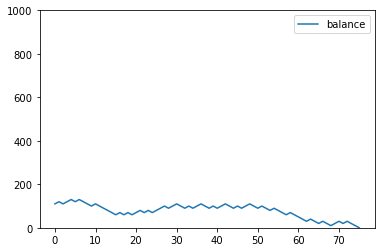

In [19]:

(have_won, balances) = play_until_target_reached_or_ruined(100, 10, 1000)
plot(range(0, len(balances)), balances, label="balance")
axis(ymin = 0, ymax = 1000)
legend()
show()

### Abhängigkeit der Gewinnwahrscheinlichkeit von Einsatz und Zielbetrag. 

Zum Schluss wollen wir noch visualisieren, wie die Gewinnwahrscheinlichkeit vom Einsatz und dem gewünschten Zielbetrag abhängt. Wir nutzen dazu unsere Funktion, die für gegebene Parameter zählt, wie oft wir gewonnen haben. 

In [21]:
def count_wins_in_n_games(number_of_tries, initial_amount, bet_per_game, target_amount):

    num_wins = 0

    i = 0
    while i < number_of_tries:
        (won, balances) = play_until_target_reached_or_ruined(initial_amount, bet_per_game, target_amount)
        if won:
            num_wins = num_wins + 1
        i += 1

    return num_wins
count_wins_in_n_games(100, 100, 10, 150)

54

Um die Gewinnwahrscheinlichkeit zu berechnen, müssen wir nur nur diese Funktion aufrufen und den Anteil an Gewinnen 

[[32, 1, 0], [83, 32, 17], [62, 41, 34]]


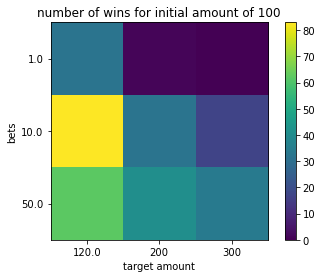

In [22]:
initial_amount = 100
 
bets = [initial_amount / 100, initial_amount / 10, initial_amount / 2]
target_amounts = [ 1.2 * initial_amount, 2 * initial_amount, 3 * initial_amount]

num_wins=[]

for i in range(0, len(bets)):
    num_wins.append([])
    for j in range(0, len(target_amounts)):
        num_wins[i].append(count_wins_in_n_games(100, initial_amount, bets[i], target_amounts[j]))
print(num_wins)
imshow(num_wins)


title("number of wins for initial amount of " +str(initial_amount))
xlabel('target amount')
xticks(range(0, len(target_amounts)), target_amounts)

ylabel('bets')
yticks(range(0, len(target_amounts)), bets)
colorbar()
show()        